In [15]:
import gensim, logging, os
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

import nltk
nltk.download('brown')
corpus = nltk.corpus.brown.sents()

fname = 'brown_skipgram.model'
if os.path.exists(fname):
    model = gensim.models.Word2Vec.load(fname)
else:
    model = gensim.models.Word2Vec(corpus, size=100, min_count=5, workers=2, iter=50)
    model.save(fname)
    

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
2019-07-01 13:16:01,530 : INFO : loading Word2Vec object from brown_skipgram.model
C:\Users\admin\Anaconda3\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
2019-07-01 13:16:01,727 : INFO : loading wv recursively from brown_skipgram.model.wv.* with mmap=None
2019-07-01 13:16:01,728 : INFO : setting ignored attribute vectors_norm to None
2019-07-01 13:16:01,728 : INFO : loading vocabulary recursively from brown_skipgram.model.vocabulary.* with mmap=None
2019-07-01 13:16:01,729 : INFO : loading trainables recursively from brown_skipgram.model.trainables.* with

In [22]:
words = "woman women man girl boy green blue did".split()
for w1 in words:
    for w2 in words:
        print(w1, w2, model.similarity(w1, w2))

woman woman 1.0
woman women 0.45691456927637314
woman man 0.6350898255935994
woman girl 0.7379687740145092
woman boy 0.6278982908150674
woman green 0.2719606939370335
woman blue 0.23461111571020238
woman did 0.046272059995909665
women woman 0.45691456927637314
women women 1.0000000000000002
women man 0.1904726735139184
women girl 0.30906963146088184
women boy 0.2835397881070414
women green 0.11486780356963791
women blue 0.10559758870785951
women did 0.08718211919196887
man woman 0.6350898255935994
man women 0.1904726735139184
man man 0.9999999999999999
man girl 0.6098892825271158
man boy 0.5831438844799812
man green 0.1127979471243022
man blue 0.05022675214059574
man did 0.030351378447386102
girl woman 0.7379687740145092
girl women 0.30906963146088184
girl man 0.6098892825271158
girl girl 1.0
girl boy 0.6991343380996002
girl green 0.27706953554034375
girl blue 0.24379481813313933
girl did -0.028862449286798993
boy woman 0.6278982908150674
boy women 0.2835397881070414
boy man 0.58314388

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  after removing the cwd from sys.path.


C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  if __name__ == '__main__':


[Text(0, 0, ''),
 Text(0, 0, 'woman'),
 Text(0, 0, 'women'),
 Text(0, 0, 'man'),
 Text(0, 0, 'girl'),
 Text(0, 0, 'boy'),
 Text(0, 0, 'green'),
 Text(0, 0, 'blue'),
 Text(0, 0, 'did')]

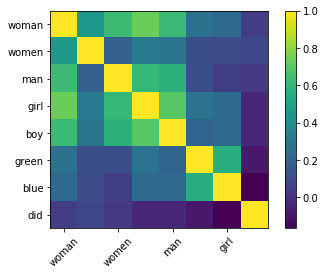

In [24]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
words = "woman women man girl boy green blue did".split()

M = np.zeros((len(words), len(words)))
for i, w1 in enumerate(words):
    for j, w2 in enumerate(words):
        M[i, j] = model.similarity(w1, w2)
        
plt.imshow(M, interpolation='nearest')
plt.colorbar()

ax = plt.gca()
ax.set_xticklabels([''] + words, rotation=45)
ax.set_yticklabels([''] + words)

In [26]:
model.most_similar(positive=['man'], topn=10)

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
2019-07-01 13:25:20,206 : INFO : precomputing L2-norms of word weight vectors


[('woman', 0.6350898742675781),
 ('girl', 0.6098892688751221),
 ('boy', 0.5831438302993774),
 ('person', 0.562477707862854),
 ('writer', 0.5544531345367432),
 ('guy', 0.5303043723106384),
 ('citizen', 0.5004198551177979),
 ('child', 0.4916771948337555),
 ('lady', 0.48987191915512085),
 ('victim', 0.4763389825820923)]